In [1]:
import logging

from judgesync import AlignmentTracker, ScoreRange

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    datefmt="%H:%M:%S",
)

In [2]:
# Load your evaluation data
tracker = AlignmentTracker(score_range=ScoreRange.FIVE_POINT)
tracker.load_human_scores_from_csv("sample_data.csv")

11:14:22 - judgesync.alignment - INFO - Loading human scores from sample_data.csv
11:14:22 - judgesync.alignment - INFO - Loaded 50 items


# Prompt comparison

In [3]:
prompt_comparison = tracker.create_comparison()

In [4]:
prompt_comparison.add_judge(
    name="strict",
    system_prompt="You are a very strict evaluator. Only give high scores to great responses.",
)

prompt_comparison.add_judge(
    name="balanced",
    system_prompt="You are a balanced evaluator. Consider both strengths and weaknesses fairly.",
)

prompt_comparison.add_judge(
    name="lenient",
    system_prompt="You are a generous evaluator. Focus on the positive aspects of responses.",
)

#Prompts are appended with text relative to the point scale chosen.

In [5]:
prompt_comparison.judges['strict'].system_prompt

'You are a very strict evaluator. Only give high scores to great responses.'

In [6]:
prompt_results = prompt_comparison.run_comparison(
    tracker.data_loader.items, use_async=True
)
print(prompt_results)

11:14:22 - judgesync.comparison - INFO - Comparing 3 judges on 50 items...
11:14:22 - judgesync.comparison - INFO - Running judge 'strict'...
11:14:25 - judgesync.comparison - INFO - Running judge 'balanced'...
11:14:27 - judgesync.comparison - INFO - Running judge 'lenient'...


JUDGE COMPARISON RESULTS

Rankings by Kappa Score:
  1. strict: κ=0.251, Agreement=50.0%, Correlation=0.455
  2. balanced: κ=0.028, Agreement=30.0%, Correlation=0.446
  3. lenient: κ=-0.003, Agreement=8.0%, Correlation=0.201

🏆 Best Judge: strict


11:14:30 - judgesync.comparison - INFO - Figure saved to: prompt_comparison.png


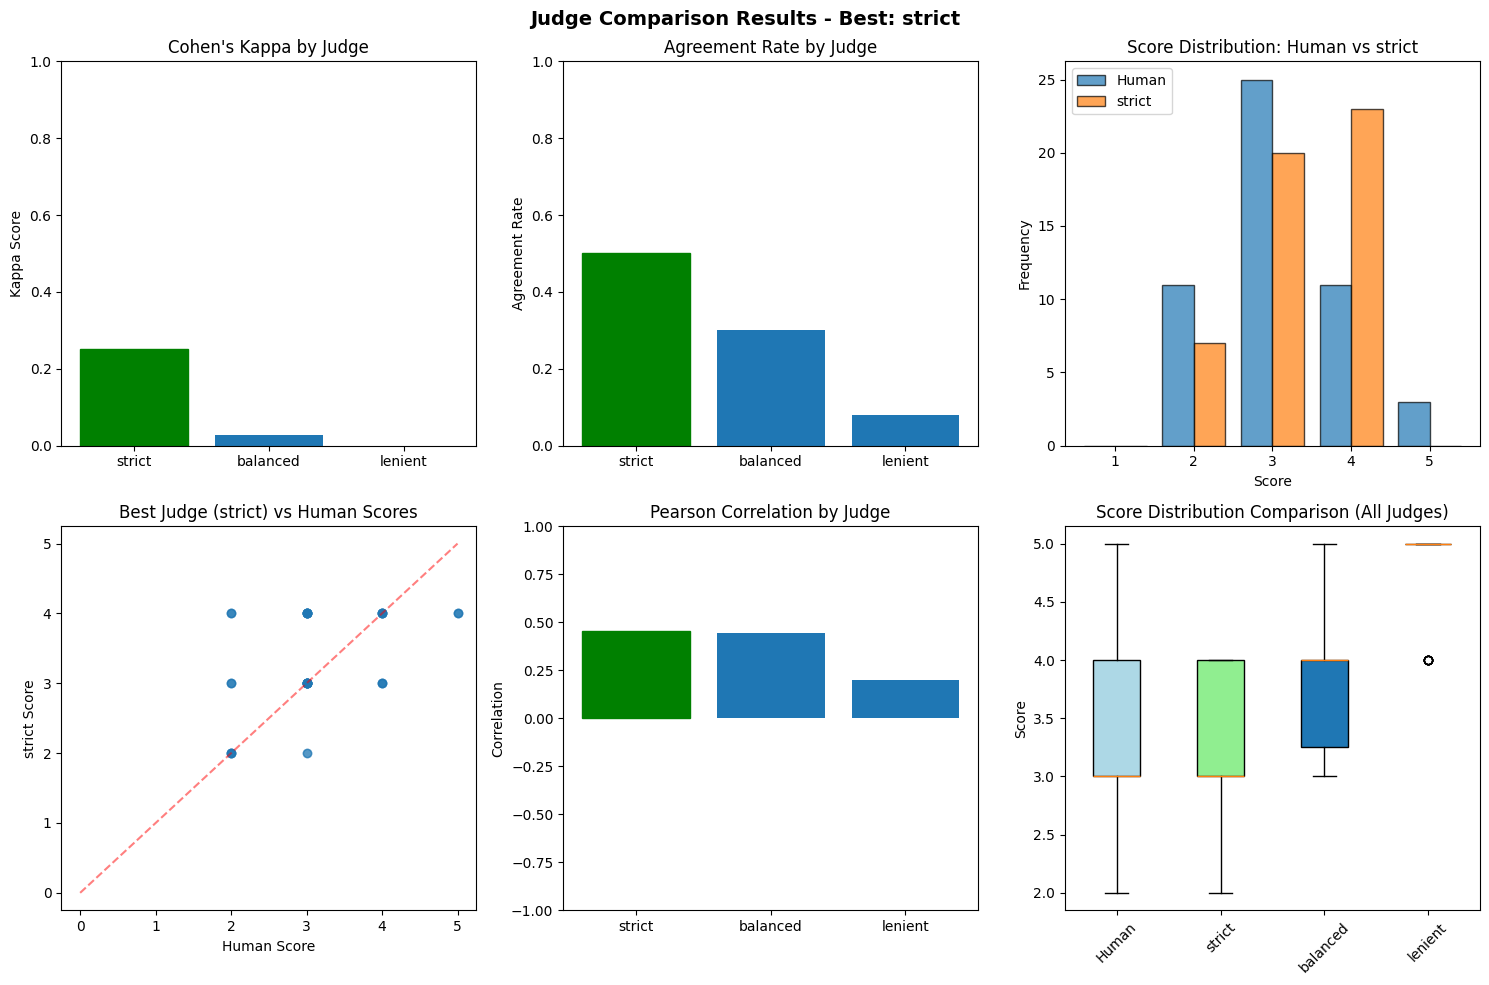

In [7]:
prompt_comparison.plot_comparison(
    prompt_results, save_path="prompt_comparison.png", show=True
)

In [8]:
prompt_comparison.add_judge(
    name="extremely_strict",
    system_prompt="You are an extremely strict evaluator. Only give high scores to exceptional responses.",
)

In [9]:
prompt_results = prompt_comparison.run_comparison(
    tracker.data_loader.items, use_async=True
)
print(prompt_results)

11:14:31 - judgesync.comparison - INFO - Comparing 4 judges on 50 items...
11:14:31 - judgesync.comparison - INFO - Running judge 'strict'...
11:14:41 - judgesync.comparison - INFO - Running judge 'balanced'...
11:14:44 - judgesync.comparison - INFO - Running judge 'lenient'...
11:14:48 - judgesync.comparison - INFO - Running judge 'extremely_strict'...


JUDGE COMPARISON RESULTS

Rankings by Kappa Score:
  1. strict: κ=0.182, Agreement=44.0%, Correlation=0.434
  2. extremely_strict: κ=0.126, Agreement=46.0%, Correlation=0.313
  3. balanced: κ=0.044, Agreement=32.0%, Correlation=0.468
  4. lenient: κ=-0.003, Agreement=8.0%, Correlation=0.201

🏆 Best Judge: strict


11:14:51 - judgesync.comparison - INFO - Figure saved to: prompt_comparison.png


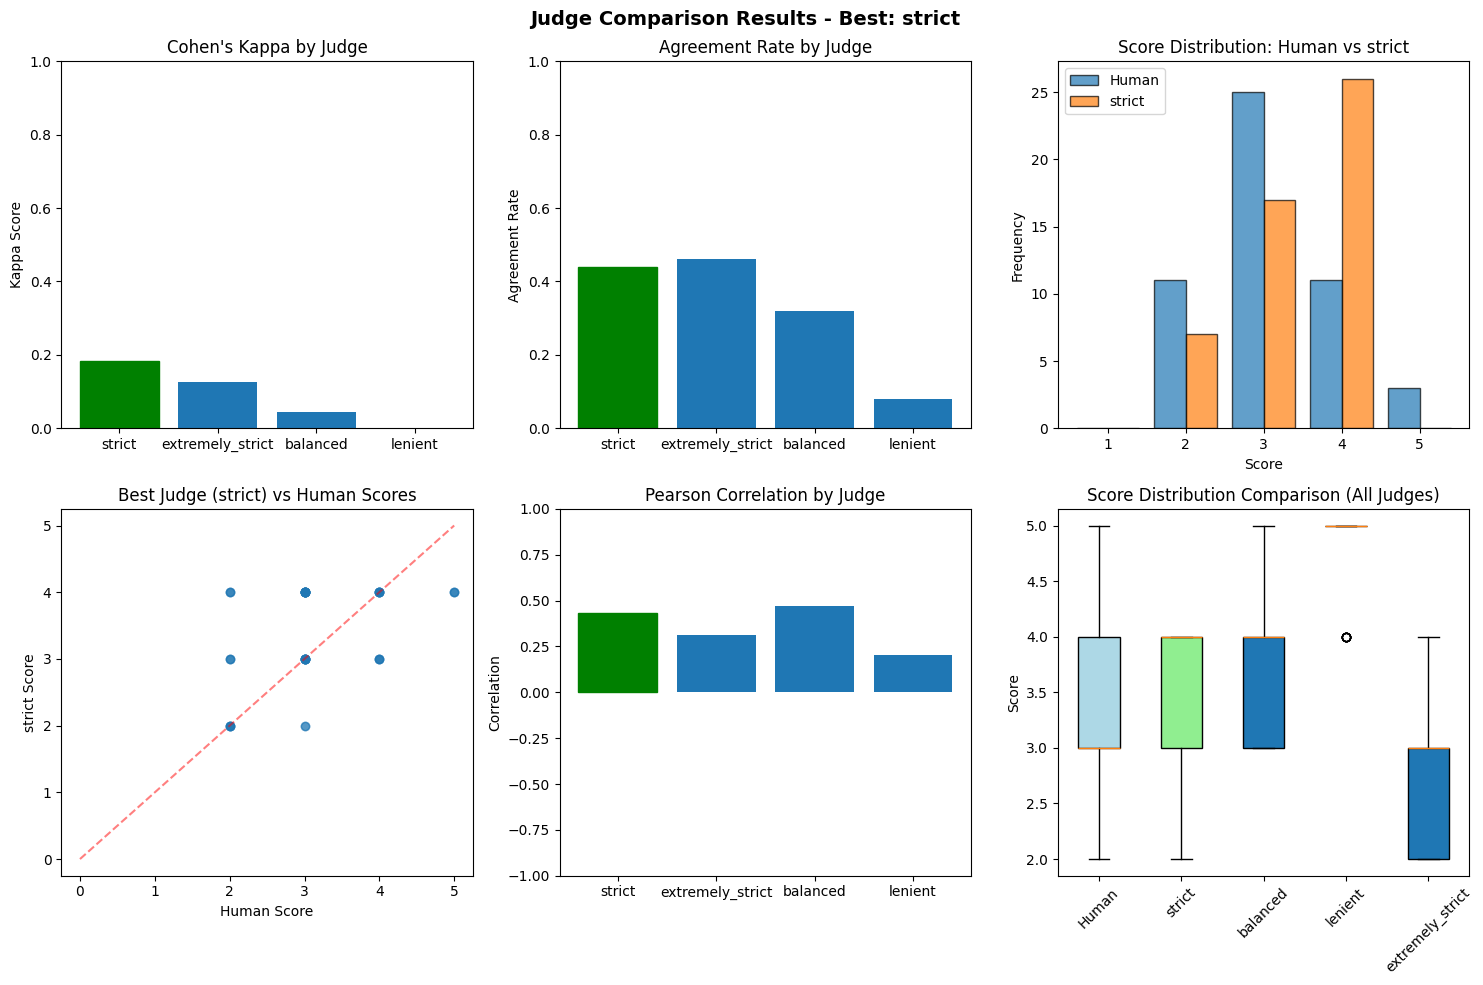

In [10]:
prompt_comparison.plot_comparison(
    prompt_results, save_path="prompt_comparison.png", show=True
)

# Comparing different model configurations

In [11]:
model_comparison = tracker.create_comparison()

model_comparison.add_judge(
    name="gpt-4-cold",
    system_prompt="Evaluate the response quality.",
    temperature=0.0,
)

model_comparison.add_judge(
    name="gpt-4-warm",
    system_prompt="Evaluate the response quality.",
    temperature=0.7,
)

In [12]:
model_results = model_comparison.run_comparison(
    tracker.data_loader.items, use_async=True
)
print(model_results)

11:14:51 - judgesync.comparison - INFO - Comparing 2 judges on 50 items...
11:14:51 - judgesync.comparison - INFO - Running judge 'gpt-4-cold'...
11:14:58 - judgesync.comparison - INFO - Running judge 'gpt-4-warm'...


JUDGE COMPARISON RESULTS

Rankings by Kappa Score:
  1. gpt-4-cold: κ=0.098, Agreement=30.0%, Correlation=0.510
  2. gpt-4-warm: κ=0.044, Agreement=26.0%, Correlation=0.523

🏆 Best Judge: gpt-4-cold


11:15:02 - judgesync.comparison - INFO - Figure saved to: model_comparison.png


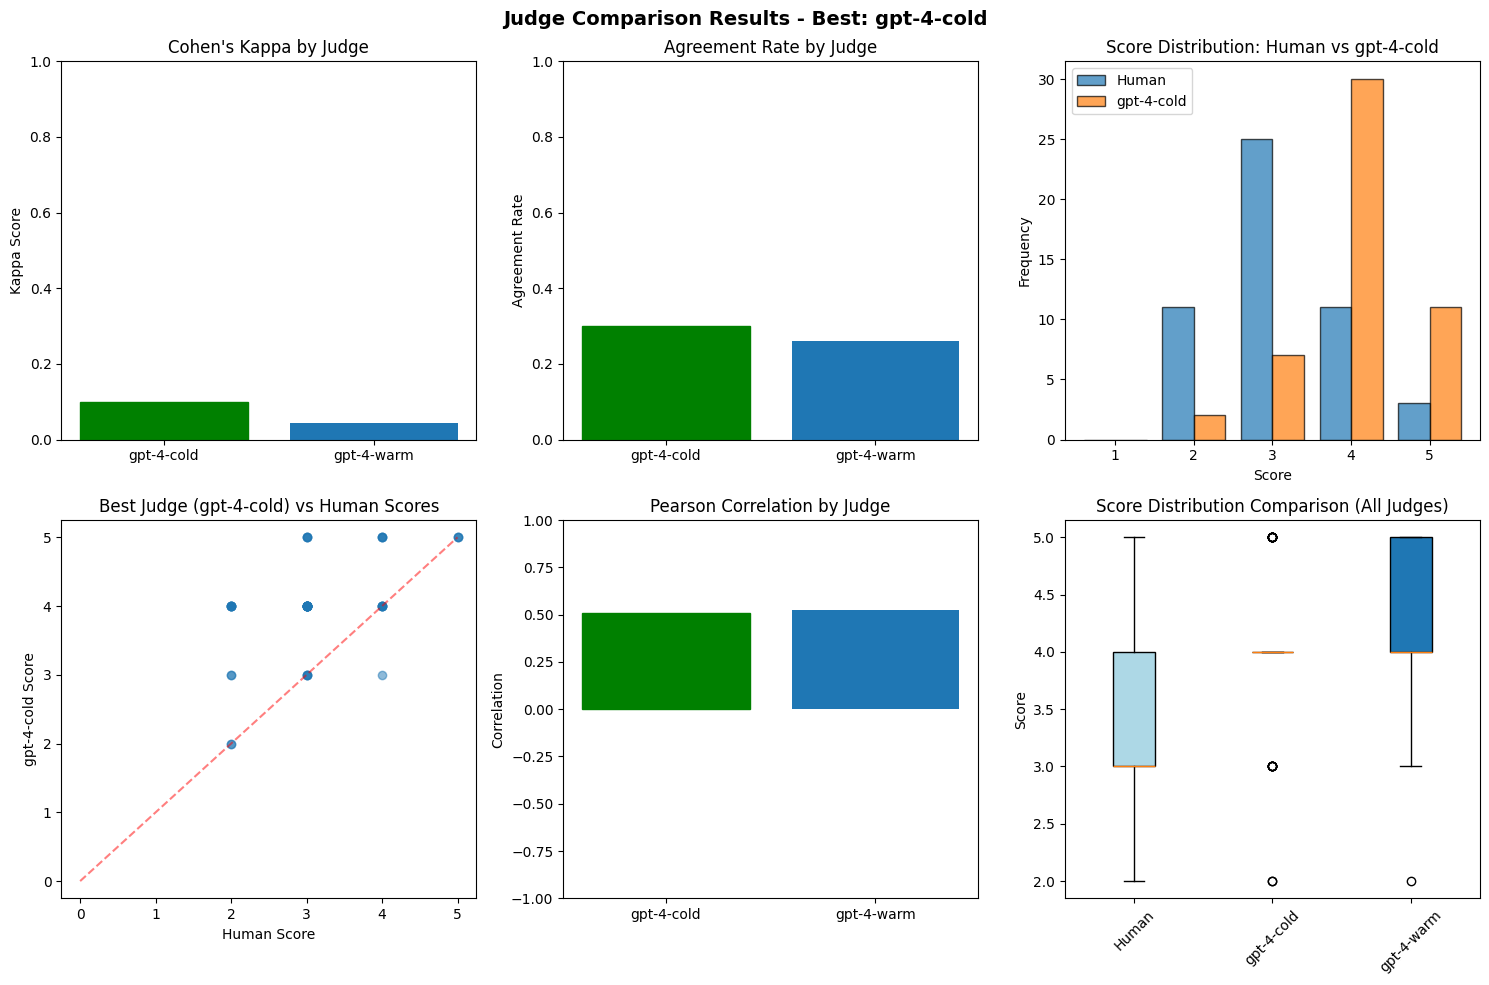

In [13]:
model_comparison.plot_comparison(
    model_results, save_path="model_comparison.png", show=True
)

In [14]:
disagreements = prompt_comparison.get_disagreement_items(prompt_results, threshold=1.0)
print(f"\nFound {len(disagreements)} items with high disagreement between prompts")


Found 13 items with high disagreement between prompts


In [15]:
print(disagreements)

    human_score  strict  balanced  lenient  extremely_strict
2           4.0     3.0       4.0      5.0               2.0
7           4.0     3.0       4.0      5.0               2.0
8           3.0     3.0       3.0      5.0               2.0
11          3.0     3.0       4.0      5.0               2.0
14          2.0     2.0       3.0      5.0               2.0
21          3.0     3.0       4.0      5.0               2.0
25          2.0     2.0       3.0      5.0               2.0
31          2.0     3.0       3.0      5.0               2.0
37          3.0     4.0       4.0      5.0               2.0
40          3.0     3.0       3.0      5.0               2.0
41          3.0     3.0       3.0      5.0               2.0
43          3.0     3.0       3.0      5.0               3.0
49          3.0     3.0       4.0      5.0               2.0
